# Question B 

## Import Data

#### Below are our steps for importing and initial data transformations. We removed unneeded features from the dataset, introduced a "true" or "false" labeing class, combined the two data series and added the title into the main text. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")
true.head() #there is a lot of unneeded info - such as subject & date

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [2]:
#keep only the title and text columns 
true_1 = true[["title", "text"]]
fake_1 = fake[["title", "text"]]
fake_1.head() 

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [3]:
# Assign labels based on the truth/fakeness of the text
true_1['class'] = 1 
#assign real news a label of 1
fake_1["class"] = 0 
#assign fake news a label of 0 


<ipython-input-3-05e137f6c983>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_1['class'] = 1
<ipython-input-3-05e137f6c983>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_1["class"] = 0


In [4]:
# Concatenate both dataframes into 1 
frames= [true_1, fake_1]
df = pd.concat(frames)

# make the title & text a single column 
df["article"] = df["title"] + " "+ df["text"]
df.drop(["title", "text"], axis=1)

,class,article
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
23476,0,McPain: John McCain Furious That Iran Treated ...
23477,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,0,How to Blow $700 Million: Al Jazeera America F...


## Text Processing

#### We used nltk to remove the stopwords in the dataset, all words with 2 or fewer charecters, removed punctuation, and changed all the text to lower-case. 

In [5]:
import nltk.corpus
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
df["article_wo_stopwords"] = df["article"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop_words)]))
df[["article", "article_wo_stopwords"]].head(5)

,article,article_wo_stopwords
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f..."
1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...


In [6]:
df["article_wo_smallword"] = df["article_wo_stopwords"].apply(lambda x: " ".join([word for word in x.split() if len(word) > 2]))
df[["article", "article_wo_stopwords", "article_wo_smallword"]].head(-5)
df

,title,text,class,article,article_wo_stopwords,article_wo_smallword
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f...","U.S. budget fight looms, Republicans flip fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...,Trump wants Postal Service charge 'much more' ...
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,McPain: John McCain Furious That Iran Treated ...,McPain: John McCain Furious That Iran Treated ...,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...,Sunnistan: Allied ‘Safe Zone’ Plan Take Territ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,How to Blow $700 Million: Al Jazeera America F...,How Blow $700 Million: Al Jazeera America Fina...,How Blow $700 Million: Jazeera America Finally...


In [9]:
import re
def preprocessing(text):
    text = re.sub("<[^>]*>", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text=text.lower()
    return text 

df["clean_articles"] = df["article_wo_smallword"].apply(preprocessing)
df["clean_articles"] #check if changes have been applied 

0        us budget fight looms republicans flip fiscal ...
1        us military accept transgender recruits monday...
2        senior us republican senator let mr mueller jo...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge much more am...
                               ...                        
23476    mcpain john mccain furious that iran treated s...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan allied safe zone plan take territori...
23479    how blow 700 million jazeera america finally c...
23480    us navy sailors held iranian military signs ne...
Name: clean_articles, Length: 44898, dtype: object

## Split and tokenize the text

#### We split the data into a train and test set in order to train our model. We also used a tokenizer to tokenize the top 10,000 most common words. Because we are using a Bi-LSTM model our words need to be padded to create vectors of the same size as inputs into the model. By using the OOV token and padding we did not have to manually vectorize our text. We chose to s

In [10]:
most_common_size = 10000 #take most common 10,000 words 
max_len = 256 #256 characters per sequence 
unrecognized_words = "OOV" #where OOV stands for "out of vocabulary", used for words that aren't in word index 
padding = "post" #pad article length to 256 (adding 56 zeros)
truncation = "post"

In [11]:
#Set the tokenizer 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = most_common_size, oov_token = unrecognized_words) #specify 10,000 most frequent words 
tokenizer.fit_on_texts(df) #method that goes through text, creating dictionary 

In [58]:
from sklearn.model_selection import train_test_split

X = df["clean_articles"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [59]:
X_train = tokenizer.texts_to_sequences(X_train) #converts tokens of text corpus to sequence of integers (which is the index of a token in a dictionary)
X_test = tokenizer.texts_to_sequences(X_test)

In [60]:
X_train= tf.keras.preprocessing.sequence.pad_sequences(X_train, padding = padding, truncating = truncation, maxlen = max_len)
X_test= tf.keras.preprocessing.sequence.pad_sequences(X_test, padding = padding, truncating = truncation, maxlen = max_len)

## Building Out the Model 

You can call Bi-Directional LSTM from Keras and where fitting set Sigmoid and ReLU as activation function, adam as the optimizer, and binary cross-entropy loss function should be used. 

#### To build out our model we used a sequrntial model with the following layers
- Embedding layer to transform our inputs in our input layer into fixed size vectors of 64. 

We wanted a size that was large enough to represent our data but not too large to allow for faster processing. We tested different values and found that our loss and accuracy did not change very much 

- Our first bidirectional layer 
- A dropout layer

The droput layer is there to drop nodes in an attempt to reduce overfitting. The .5 value is the fraction of nodes to drop. 

- Our second bidirectional layer
- A second dropout layer
- A dense layer with the sigmoid activation

The assignment asked us to apply two different activation layers. We found that by placing the sigmoid function first our accuracy increased. This makes sense because the sigmoid function has a tendency to apply a very small level of differintiation between values that can cause gradient decent to be very slow and leads to the vanishing gradient problem. By applying ReLu after (where ReLu only applies 1s and 0s to given values) the activation function benefits from the activation of sigmoid and allows for more simple gradient decent. 
- a ReLu activation layer
- Dense layer with a shape of one

this layer allows for an output shape of 1 indicating a T/F statement for answering the question of if the news is fake or true

- after the model is developed the model is comiled with binary crossentropy function and the adam optimizer is used. 

In [44]:
dim = 50
bd_out = 64
bd_out2 = 64

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(most_common_size, dim), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(bd_out, return_sequences = True)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(bd_out2)), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(1)
])

#I read that you need a dropout layer after each bidirection layer

# We probably need to comment on what each layer in the lstm model is doing here. 

model_lstm.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_14 (Bidirecti  (None, None, 128)        84480     
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, None, 128)         0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                

In [45]:
model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
             optimizer=tf.keras.optimizers.Adam(1e-2), 
             metrics=["accuracy"])

## Batch Size & Epochs

During training set the batch size to 64 and the number of epochs to 2

In [46]:
early_stop =tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 2, restore_best_weights=True)

history = model_lstm.fit(X_train, y_train, epochs = 2, validation_split= 0.1, batch_size = 64, callbacks=[early_stop])

Epoch 1/2
506/506 [==============================] - 257s 498ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6913 - val_accuracy: 0.5329
Epoch 2/2
506/506 [==============================] - 242s 479ms/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.6913 - val_accuracy: 0.5329


In [47]:
history

In [48]:
print(history.history)

{'loss': [0.6925122141838074, 0.6923943161964417], 'accuracy': [0.5224586725234985, 0.5224586725234985], 'val_loss': [0.6912559866905212, 0.6913266181945801], 'val_accuracy': [0.5328508019447327, 0.5328508019447327]}


In [49]:
#something is weird here
def plot_graphs(history, title):
  plt.plot(history.history[title])
  plt.plot(history.history['val_'+title], '')
  plt.xlabel("Epochs")
  plt.ylabel(title)
  plt.legend([title, 'val_'+title])
  plt.show()

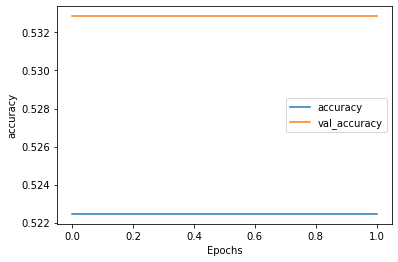

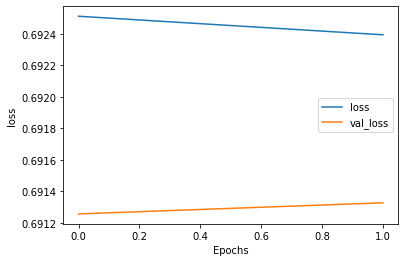

In [50]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#why is this code only showing 1 epoch when I trained two!

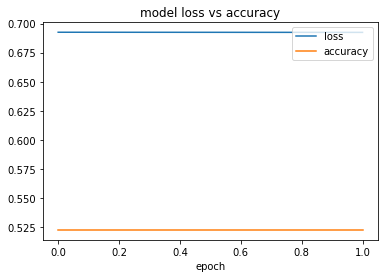

In [52]:
 from matplotlib import pyplot
 
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report

In [54]:
predicted = np.argmax(model_lstm.predict(X_test), axis=-1)
#predict has two different methods depending onif sigmoid or softmax is used last. 
print(classification_report(y_test, predicted))

#these results are bad. We should reorganize our layers.

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4678
           1       0.00      0.00      0.00      4302

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.36      8980



C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

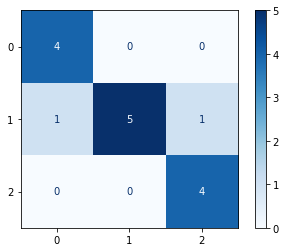

In [55]:
#This could work but it needs work. Ugh

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = np.array(
y_tst = np.array(
labels = ["Fake", "True"]

cm = confusion_matrix(y_tst, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
results = model_lstm.evaluate(X_test, y_test, batch_size=128)
print("test loss, test accuracy:", results)

71/71 [==============================] - 19s 274ms/step - loss: 0.6923 - accuracy: 0.5209
test loss, test accuracy: [0.6922727227210999, 0.5209354162216187]
